<a href="https://colab.research.google.com/github/kajallsingh/LibraryManager/blob/main/AMI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load dataset
df=pd.read_csv("Medicaldataset.csv")
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [ ]:
le = LabelEncoder()
df['Result'] = le.fit_transform(df['Result'])
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


Displaying basic information of dataset

In [ ]:
print("BAsic information of the dataset: ", df.info)
print(df.describe())
print(df.isnull().sum)
print(df['Result'].value_counts())

BAsic information of the dataset:  <bound method DataFrame.info of       Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result  
0                           83        160.0   1.80     0.012       0  
1                           46        296.0   6.75     1.060       1  
2                      

Data Visualization

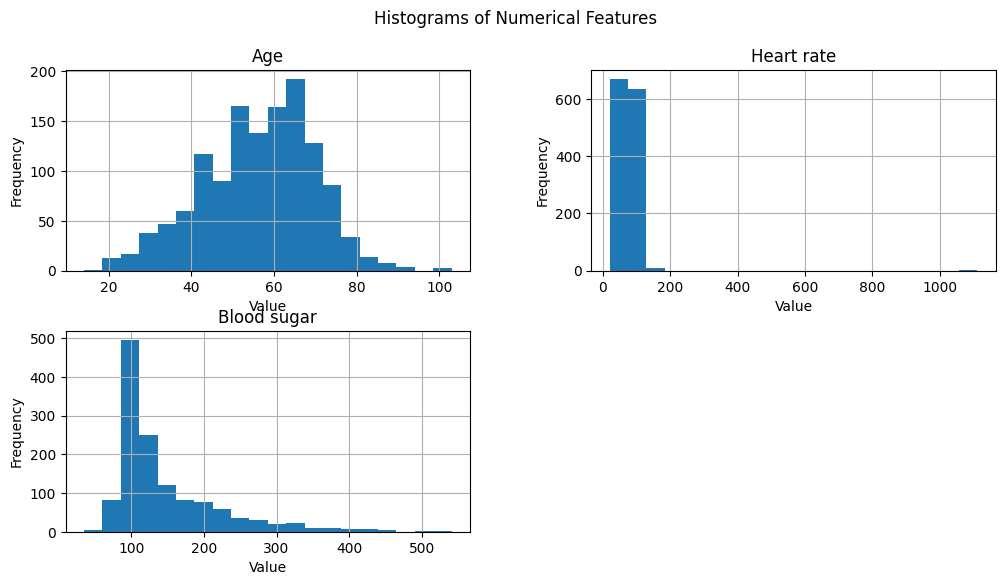

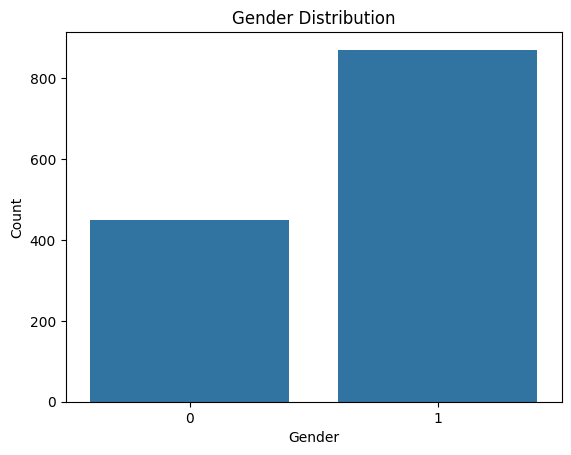

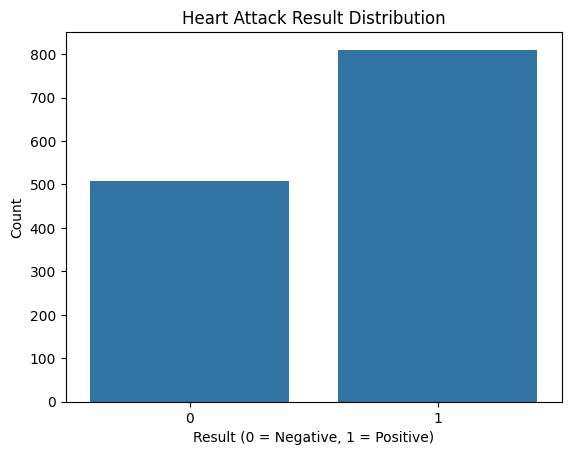

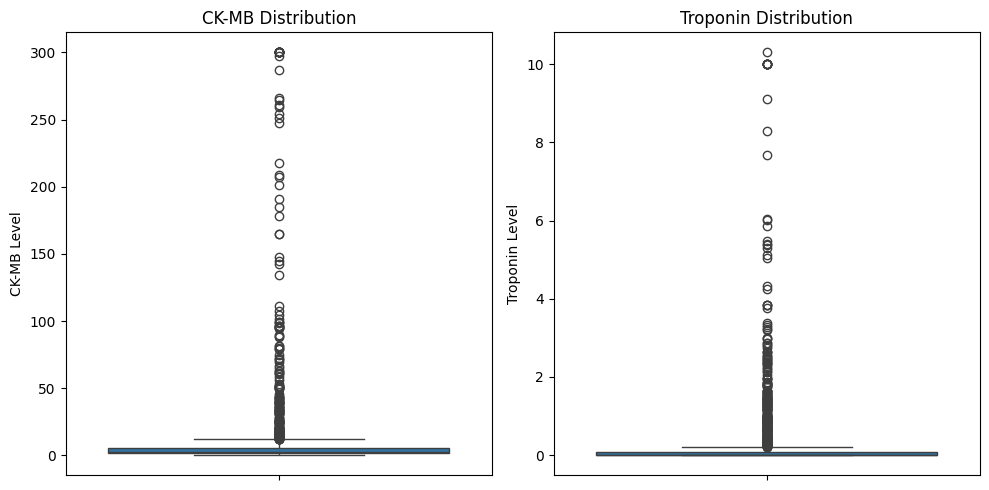

In [ ]:
# Histogram for numerical features
df[['Age','Heart rate','Blood sugar']].hist(bins=20, figsize=(12,6))
plt.suptitle("Histograms of Numerical Features")
for ax in plt.gcf().axes:
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
plt.show()

# Countplot for Gender
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Countplot for Result
sns.countplot(x='Result', data=df)
plt.title("Heart Attack Result Distribution")
plt.xlabel("Result (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# Boxplot for CK-MB and Troponin
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(y='CK-MB', data=df)
plt.title("CK-MB Distribution")
plt.ylabel("CK-MB Level")

plt.subplot(1,2,2)
sns.boxplot(y='Troponin', data=df)
plt.title("Troponin Distribution")
plt.ylabel("Troponin Level")

plt.tight_layout()
plt.show()

Preprocessing

In [ ]:
# Features & Target
X = df.drop("Result", axis=1)
y = df["Result"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

Evaluation


 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       102
           1       0.83      0.85      0.84       162

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264



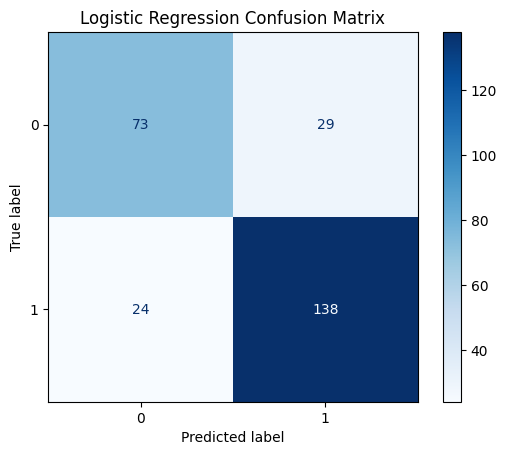


 Model: Random Forest
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



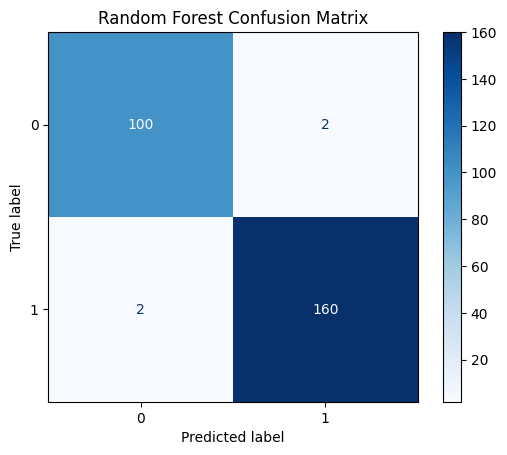


 Model: XGBoost
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



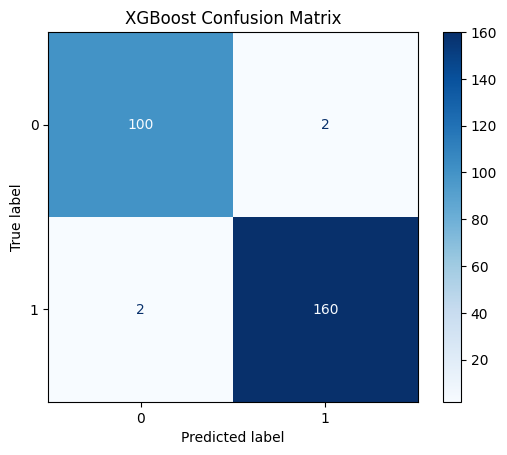


 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       102
           1       0.83      0.85      0.84       162

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264



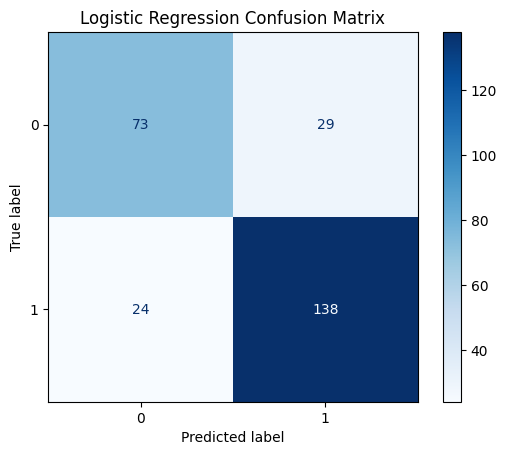


 Model: Random Forest
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



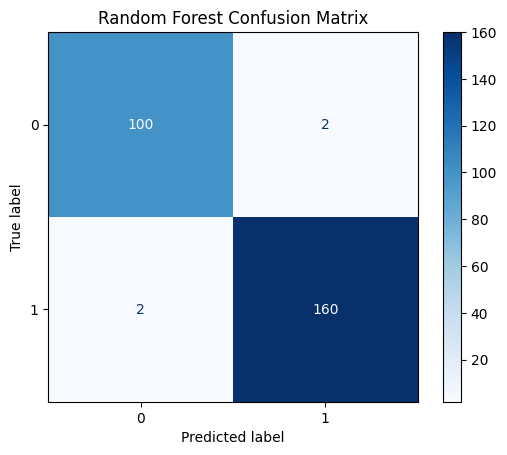


 Model: XGBoost
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



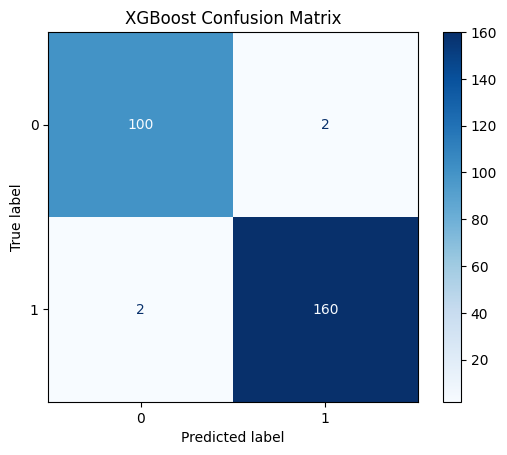

In [ ]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n Model: {name}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Evaluate all models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

ROC Curve

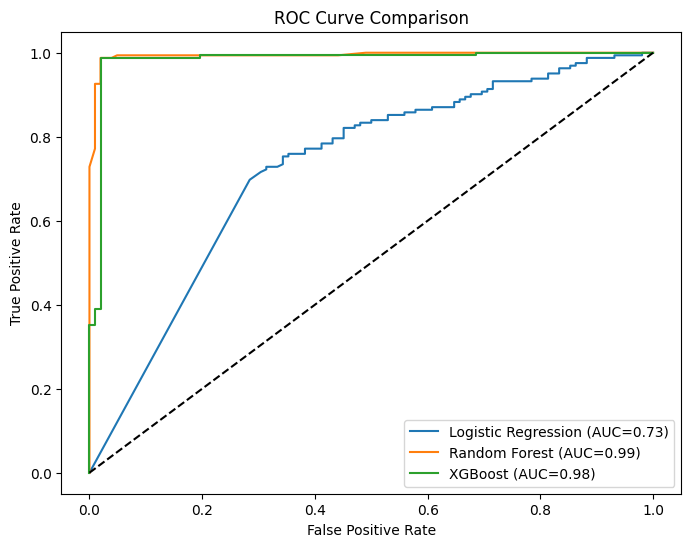

In [ ]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb
}

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [ ]:
joblib.dump(log_reg, "log_reg_model.pkl")
joblib.dump(rf, "rf_model.pkl")
joblib.dump(xgb, "xgb_model.pkl")
print("Model is saved")

Model is saved


Make predcictions for new patients

In [ ]:
# Load the saved model (Random Forest in our case)
# model = joblib.load("rf_model.pkl")

# # Example new patient data
# # Format: [Age, Gender, Heart rate, Systolic BP, Diastolic BP, Blood Sugar, CK-MB, Troponin]
# new_patient = [[64, 1, 66, 160, 83, 160, 1.8, 0.012]]

# # Scale the input (important!)
# new_patient_scaled = scaler.transform(new_patient)

# # Predict
# prediction = model.predict(new_patient_scaled)[0]

# # Decode result (0 = negative, 1 = positive)
# result = le.inverse_transform([prediction])[0]
# print("✅ Prediction for new patient:", result)

✅ Prediction for new patient: negative


In [ ]:
9# Take input from user
age = int(input("Enter Age: "))
gender = int(input("Enter Gender (0=Male, 1=Female): "))
hr = int(input("Enter Heart Rate: "))
sbp = int(input("Enter Systolic BP: "))
dbp = int(input("Enter Diastolic BP: "))
sugar = float(input("Enter Blood Sugar: "))
ckmb = float(input("Enter CK-MB: "))
troponin = float(input("Enter Troponin: "))

# Put into dataframe
patient = [[age, gender, hr, sbp, dbp, sugar, ckmb, troponin]]

# Scale and predict
patient_scaled = scaler.transform(patient)
prediction = model.predict(patient_scaled)[0]

# Decode result
print("✅ Final Prediction:", le.inverse_transform([prediction])[0])

Enter Age: 54
Enter Gender (0=Male, 1=Female): 0
Enter Heart Rate: 94
Enter Systolic BP: 122
Enter Diastolic BP: 67
Enter Blood Sugar: 97
Enter CK-MB: 1.42
Enter Troponin: .012
✅ Final Prediction: negative
